In [12]:
import sys
sys.path.append('cocoapi\PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
#     print(features)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)
    return features

def clean_sentence(output):
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = data_loader.dataset.vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

def fetch_image(file_name):
    orig_image = Image.open(file_name).convert('RGB')
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    transform_test = transforms.Compose([ 
        transforms.Resize(256),                          
        transforms.CenterCrop(224),                             
        transforms.ToTensor(),                           
        transforms.Normalize((0.485, 0.456, 0.406),      
                             (0.229, 0.224, 0.225))])
    input_image = transform_test(orig_image)
    return orig_image, input_image

def generate_caption(input_image,encoder):
    print(input_image.shape)
    features = encoder(input_image).unsqueeze(1)
    features.to(device)
#     print(features.shape)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

In [15]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
%load_ext autoreload
%autoreload 2

import os
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-1.pkl'
decoder_file = 'decoder-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()

decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
print(os.getcwd())
address = os.path.join(os.getcwd(),'models', encoder_file)
print(address)
# Load the trained weights.
encoder.load_state_dict(torch.load(address))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
9 2048
C:\Users\ACER\PycharmProjects\firstTest\Image-Captioning-master
C:\Users\ACER\PycharmProjects\firstTest\Image-Captioning-master\models\encoder-1.pkl


DecoderRNN(
  (word_embeddings): Embedding(10321, 512)
  (embed): Embedding(10321, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=10321, bias=True)
)

REMOVED ONE BLOCK

In [52]:
import torch.nn as nn
import os
import torchvision.models as models
from model_flexi import EncoderCNN_v1, DecoderRNN_v1

# TODO #2: Specify the saved models to load.
encoder_4_file = 'comparitive_encoder-1.pkl'
decoder_4_file = 'comparitive_decoder-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

resnet = models.resnet152(pretrained=True)
modules = list(resnet.children())[:-1]
modules.pop(7)                                                                                                                                                              
# len(modules)
# modules.pop()
embed_size,input_length, modules = 512,1024, nn.Sequential(*modules)
# print(embed_size,input_length, modules )
Encoder_4_layer = EncoderCNN_v1(embed_size,input_length, modules)

Encoder_4_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_4_file)))

Decoder_4_layer = DecoderRNN_v1(embed_size, hidden_size, vocab_size)
Decoder_4_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_4_file)))

Encoder_4_layer.to(device)
Encoder_4_layer.eval()
Decoder_4_layer.to(device)
Decoder_4_layer.eval()

RuntimeError: CUDA out of memory. Tried to allocate 22.00 MiB (GPU 0; 4.00 GiB total capacity; 2.17 GiB already allocated; 0 bytes free; 2.35 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

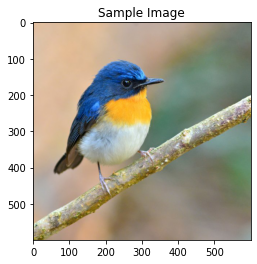

a white bird sitting on top of a branch . 


In [22]:
file_name = 'bird.jpg'
address = os.path.join(os.getcwd(),'images',file_name)
orig_image, input_image = fetch_image(address)
temp_v_features = encoder(input_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
decoder_output,_,_ = decoder.sample(temp_v_features.to(device))
print(clean_sentence(decoder_output))

In [24]:
import torch
torch.cuda.empty_cache()

removed 2 blocks

In [25]:
import torch.nn as nn
import os
import torchvision.models as models
from model_flexi import EncoderCNN_v1, DecoderRNN_v1

# TODO #2: Specify the saved models to load.
encoder_3_file = 'comparitive_encoder_2-1.pkl'
decoder_3_file = 'comparitive_decoder_2-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

resnet = models.resnet152(pretrained=True)
modules = list(resnet.children())[:-1]
modules.pop(7)
modules.pop(6)
# len(modules)
# modules.pop()
embed_size,input_length, modules = 512,512, nn.Sequential(*modules)
# print(embed_size,input_length, modules )
Encoder_3_layer = EncoderCNN_v1(embed_size,input_length, modules)
Encoder_3_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_3_file)))

Decoder_3_layer = DecoderRNN_v1(embed_size, hidden_size, vocab_size)
Decoder_3_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_3_file)))

Encoder_3_layer.to(device)
Encoder_3_layer.eval()
Decoder_3_layer.to(device)
Decoder_3_layer.eval()

DecoderRNN_v1(
  (word_embeddings): Embedding(10321, 512)
  (embed): Embedding(10321, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=10321, bias=True)
)

Removed 3 Blocks

In [51]:
import torch.nn as nn
import os
import torchvision.models as models
from model_flexi import EncoderCNN_v1, DecoderRNN_v1

# TODO #2: Specify the saved models to load.
encoder_2_file = 'comparitive_encoder_3-1.pkl'
decoder_2_file = 'comparitive_decoder_3-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

resnet = models.resnet152(pretrained=True)
modules = list(resnet.children())[:-1]
modules.pop(7)
modules.pop(6)
modules.pop(5)
# len(modules)
# modules.pop()
embed_size,input_length, modules = 512,256, nn.Sequential(*modules)
# print(embed_size,input_length, modules )
Encoder_2_layer = EncoderCNN_v1(embed_size,input_length, modules)
Encoder_2_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_2_file)))

Decoder_2_layer = DecoderRNN_v1(embed_size, hidden_size, vocab_size)
Decoder_2_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_2_file)))

Encoder_2_layer.to(device)
Encoder_2_layer.eval()
Decoder_2_layer.to(device)
Decoder_2_layer.eval()

RuntimeError: CUDA out of memory. Tried to allocate 22.00 MiB (GPU 0; 4.00 GiB total capacity; 2.17 GiB already allocated; 0 bytes free; 2.35 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

Removed 4 blocks

In [50]:
import torch.nn as nn
import os
import torchvision.models as models
from model_flexi import EncoderCNN_v1, DecoderRNN_v1

# TODO #2: Specify the saved models to load.
encoder_1_file = 'comparitive_encoder_4-1.pkl'
decoder_1_file = 'comparitive_decoder_4-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

resnet = models.resnet152(pretrained=True)
modules = list(resnet.children())[:-1]
modules.pop(7)
modules.pop(6)
modules.pop(5)
modules.pop(4)
# len(modules)
# modules.pop()
embed_size,input_length, modules = 512,64, nn.Sequential(*modules)
# print(embed_size,input_length, modules )
Encoder_1_layer = EncoderCNN_v1(embed_size,input_length, modules)
Encoder_1_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_1_file)))

Decoder_1_layer = DecoderRNN_v1(embed_size, hidden_size, vocab_size)
Decoder_1_layer.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_1_file)))

Encoder_1_layer.to(device)
Encoder_1_layer.eval()
Decoder_1_layer.to(device)
Decoder_1_layer.eval()

RuntimeError: CUDA out of memory. Tried to allocate 22.00 MiB (GPU 0; 4.00 GiB total capacity; 2.17 GiB already allocated; 0 bytes free; 2.35 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

EXTRACTING VISUAL FEATURES FROM ENSEMBLE


In [108]:
torch.cuda.empty_cache()

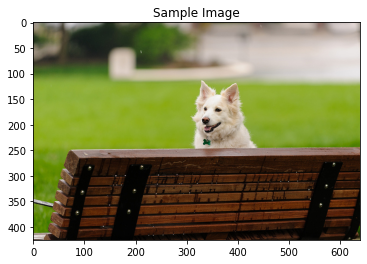

NameError: name 'Encoder_1_layer' is not defined

In [49]:
file_name = 'dog.jpg'
address = os.path.join(os.getcwd(),'images',file_name)
orig_image, input_image = fetch_image(address)

v_features_1 = Encoder_1_layer(input_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
print(v_features_1.shape)

v_features_2 = Encoder_2_layer(input_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
print(v_features_2.shape)

v_features_3 = Encoder_3_layer(input_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
print(v_features_3.shape)

v_features_4 = Encoder_4_layer(input_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
print(v_features_4.shape)

v_features_5 = encoder(input_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
print(v_features_5.shape)

In [124]:
predicted_sentence,predicted_scores,predicted_indices = Decoder_1_layer.sample(v_features_1.to(device))
clean_sentence(predicted_sentence)

'a man is playing tennis on a tennis court . '

In [22]:
# print(v_features_1)
tOutput = decoder.sample(v_features_5.to(device))
# tOutput
t_New_sentence = clean_sentence(tOutput)
t_New_sentence

'a plate of food with meat and vegetables . '

In [23]:
result = torch.sum(torch.stack([v_features_1,v_features_2,v_features_3,v_features_4,v_features_5]), dim=0)
result.shape

torch.Size([1, 1, 512])

In [48]:
# Decoder_1_layer
features_sum = torch.maximum(v_features_1,v_features_2)
features_sum = torch.maximum(features_sum,v_features_3)
features_sum = torch.maximum(features_sum,v_features_4)
features_sum = torch.maximum(features_sum,v_features_5)
# compiled_features = torch.div(features_sum,4)
# print(compile_features)
compiled_features = torch.div(features_sum,1)
output,_,_ = decoder.sample(compiled_features.to(device))
new_sentence = clean_sentence(output)
print(new_sentence)

NameError: name 'v_features_1' is not defined

In [25]:
clean_sentence(Decoder_1_layer.sample(v_features_1.to(device)))

TypeError: unhashable type: 'list'

In [26]:
predicted_sentence,predicted_scores,predicted_indices = Decoder_2_layer.sample(v_features_2.to(device))

In [ ]:
data_loader.dataset.vocab.idx2word[predicted_indices[0][0][0].item()]

In [ ]:
clean_sentence(predicted_sentence)

In [47]:
word_list = []
for i in range(0,20):
    for j in range(0,5):
        word = data_loader.dataset.vocab.idx2word[predicted_indices[i][0][j].item()]
        if word not in word_list:
            word_list.append(word)

NameError: name 'predicted_indices' is not defined

In [47]:
len(word_list)

43

In [48]:
word_indx_list = []
for word in word_lists:
    word_indx_list.append(data_loader.dataset.vocab.word2idx[word])

In [49]:
len(word_indx_list)

43

In [67]:
import pandas as pd
myDataFrame = pd.DataFrame(columns = word_list)

In [51]:
myDataFrame

,<start>,one,dog,pizza,group,a,the,two,an,there,...,in,knife,.,<end>,it,top,paper,to,<unk>,''


In [71]:
myDataFrame.transpose().to_csv("test.csv")

In [31]:
features_sum_2 = torch.maximum(v_features_1,v_features_2)
tOutput,_,_ = Decoder_2_layer.sample(features_sum_2.to(device))
# tOutput
t_New_sentence = clean_sentence(tOutput)
t_New_sentence

'a plate of food with a fork and a sandwich . '

In [38]:
Decoder_3_layer.sample(v_features_3.to(device))

In [36]:
features_sum3 = torch.maximum(v_features_1,v_features_2)
features_sum_3 = torch.maximum(features_sum3,v_features_3)
t_Output,_,_ = Decoder_3_layer.sample(features_sum_3.to(device))
# tOutput
t_New_sentence = clean_sentence(t_Output)
t_New_sentence

'a man is sitting at a table with a plate of food . '

In [39]:
data_loader.dataset.vocab.idx2word[Decoder_3_layer.sample(features_sum_3.to(device))[4]]
# (Decoder_3_layer.sample(features_sum_3.to(device))[0])

IndexError: tuple index out of range

In [40]:
clean_sentence(Decoder_4_layer.sample(v_features_4.to(device)))


TypeError: unhashable type: 'list'

In [104]:
features_sum4 = torch.maximum(v_features_1,v_features_2)
features_sum4 = torch.maximum(features_sum4,v_features_3)
features_sum4 = torch.maximum(features_sum4,v_features_4)
t_Output = Decoder_4_layer.sample(features_sum4.to(device))
# tOutput
t_New_sentence = clean_sentence(t_Output)
t_New_sentence

'a plate of food with a sandwich and salad . '

In [71]:
data_loader.dataset.vocab.idx2word[torch.argmax(Decoder_4_layer.word_embeddings.weight[7]).item()]

'propeller'

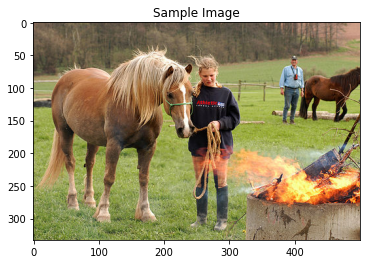

In [43]:
file_name = 'horse_girl.jpg'
address = os.path.join(os.getcwd(),'images',file_name)
orig_image, input_image = fetch_image(address)

In [118]:
import pandas as pd

predicted_sentence,predicted_scores,predicted_indices = Decoder_1_layer.sample(v_features_1.to(device))

word_list = []
for t in range(0,20):
    for w in range(0,5):
        word = data_loader.dataset.vocab.idx2word[predicted_indices[t][0][w].item()]
        if word not in word_list:
            word_list.append(word)

word_indx_list = []
for word in word_list:
    word_indx_list.append(data_loader.dataset.vocab.word2idx[word])


myDataFrame = pd.DataFrame(columns = word_list)

for t in range(0,20):
    print(f'time = {t}')
    print(predicted_indices[t][0])
    print(predicted_scores[t][0])
    for w_indx in word_indx_list:
        if w_indx in predicted_indices[t][0]:
            index = (predicted_indices[t][0]==w_indx).nonzero().item()
            print(index)
            score = predicted_scores[t][0][index].item()
        else:
            score = 0
        key_word = data_loader.dataset.vocab.idx2word[w_indx]

        myDataFrame.loc[t,key_word] = score

myDataFrame.transpose().to_csv("Decoder_1_layer_Scores_"+file_name+".csv")
print(clean_sentence(predicted_sentence))

time = 0
tensor([    0,  3347,   975,  2018,  9436,  2883,  8282, 10284,  8173,  8700],
       device='cuda:0')
tensor([22.3788,  3.2825,  3.2825,  3.2644,  3.2638,  3.2624,  3.2454,  3.2185,
         3.1864,  3.1726], device='cuda:0', grad_fn=<SelectBackward0>)
0
1
2
3
4
time = 1
tensor([  3,   9,  61,  57,  34, 234,  47, 104, 263, 905], device='cuda:0')
tensor([8.9653, 6.3235, 6.0551, 5.9833, 5.6497, 5.0901, 4.6311, 4.3361, 4.2947,
        3.9187], device='cuda:0', grad_fn=<SelectBackward0>)
0
1
2
3
4
time = 2
tensor([ 113, 2101,  717,  145,   45, 2447,  110,  350,  194,  390],
       device='cuda:0')
tensor([6.6104, 5.6299, 5.2992, 5.2474, 5.2225, 5.1775, 5.0163, 4.9578, 4.9150,
        4.9109], device='cuda:0', grad_fn=<SelectBackward0>)
0
1
2
3
4
5
time = 3
tensor([  35,  146,   39,  331, 2733,    6,   21,  106,  116,  222],
       device='cuda:0')
tensor([8.3950, 7.4093, 7.3236, 7.2454, 7.1703, 7.0867, 6.9187, 6.8618, 6.8249,
        6.7552], device='cuda:0', grad_fn=<SelectBackw

In [46]:
clean_sentence(predicted_sentence)

NameError: name 'predicted_sentence' is not defined